<a href="https://colab.research.google.com/github/kladrillono/MLA_KEL/blob/main/MLA5_KEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment**

Kendall Ladrillono

**Standard Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Imports for Ensemble Learning and Random Forests

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Imports for Splitting Data and Building Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn import set_config
set_config(display='diagram')

Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Acquire Data

In [ ]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')

In [ ]:
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

In [ ]:
landsat_train.head(5)

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [ ]:
landsat_test.head(5)

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


Statistics and Visual Exploration

<Axes: >

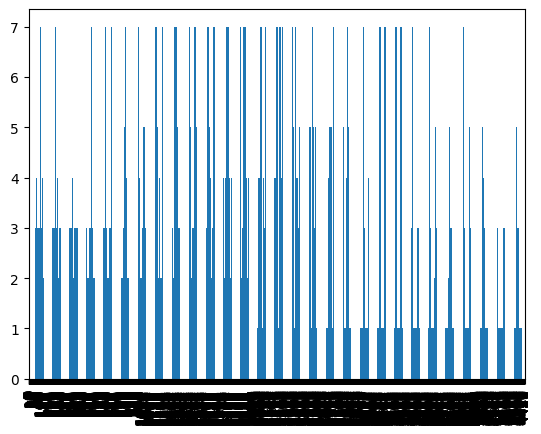

In [ ]:
landsat_train.land_type.plot(kind='bar')

<Axes: >

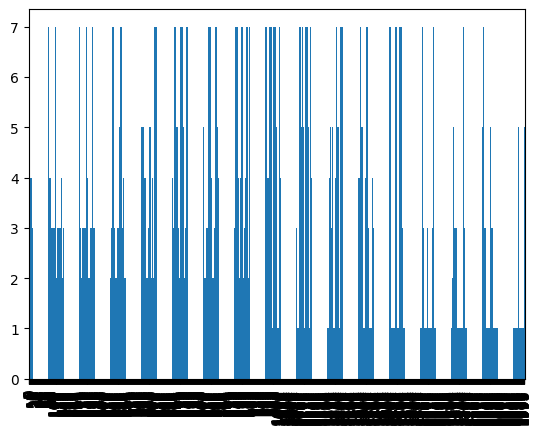

In [ ]:
landsat_test.land_type.plot(kind='bar')

Splitting Data into Train/Test

In [ ]:
X_train = landsat_train.iloc[:,0:-1]
X_test = landsat_test.iloc[:,0:-1]

In [ ]:
y_train = landsat_train[['land_type']]
y_test = landsat_test[['land_type']]

Building the Pipeline

In [ ]:
num_variables = ['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2', 'top_middle_r', 'top_middle_g',
                'top_middle_infra1', 'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1', 'top_right_infra2',
                'middle_left_r', 'middle_left_g', 'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r', 'central_pixel_g',
                'central_pixel_infra1', 'central_pixel_infra2', 'middle_right_r', 'middle_right_g', 'middle_right_infra1',
                'middle_right_infra2', 'bottom_left_r', 'bottom_left_g', 'bottom_left_infra1', 'bottom_left_infra2',
                'bottom_middle_r', 'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2', 'bottom_right_r',
                'bottom_right_g', 'bottom_right_infra1', 'bottom_right_infra2']

In [ ]:
col_transform = ColumnTransformer(transformers=[
              ('num', MinMaxScaler(), num_variables,)
              ])

In [ ]:
random_forest = Pipeline([
                  ('transform', col_transform),
                  ('rf', RandomForestClassifier(n_estimators=1000,
                                                max_samples=2000,
                                                bootstrap=True,
                                                n_jobs=-1))
])

Executing the Model

In [ ]:
random_forest.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_in...
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=2000, n_estimators=1000,
                                        n_jobs=-1))])

Evaluating the Model

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
print(y_pred)

[3 3 4 ... 5 1 5]


In [ ]:
eval_clf_model = classification_report

In [ ]:
print(eval_clf_model(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98       461
           2       0.98      0.98      0.98       224
           3       0.88      0.95      0.92       397
           4       0.77      0.62      0.69       211
           5       0.92      0.86      0.89       237
           7       0.87      0.89      0.88       470

    accuracy                           0.91      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.90      0.91      0.90      2000



In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

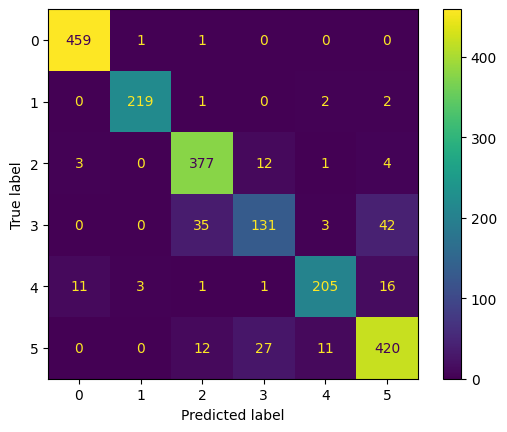

In [ ]:
disp.plot()

Conclusion

Overall, this model did well in predicting what class of land type each entity belonged. The accuracy score was 0.91, which is good. The class that this model had the most difficulty predicting was class 4. It had the lowest scores out of all classes. This is possibly attributing to the fact that it was the smallest support value.

# **Problem 2**

Bagging Classifier

Building the Pipeline

In [ ]:
bagging = Pipeline([('transform', col_transform),
                    ('bagging', BaggingClassifier(DecisionTreeClassifier(),
                                                  n_estimators=1000,
                                                  max_samples=2000,
                                                  n_jobs=-1))
                    ])

Executing the Model

In [ ]:
bagging.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_in...
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('bagging',
                 BaggingClassifier(estimator=DecisionTreeClassifier(),
                                   max_samples=2000, n_estimators=1000,
                                   n_jobs=-1))])

Evaluating the Model

In [ ]:
y_pred = bagging.predict(X_test)

In [ ]:
print(eval_clf_model(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.99      0.97       461
           2       0.98      0.96      0.97       224
           3       0.87      0.95      0.91       397
           4       0.73      0.59      0.65       211
           5       0.91      0.85      0.88       237
           7       0.86      0.88      0.87       470

    accuracy                           0.89      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.89      0.89      0.89      2000



In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

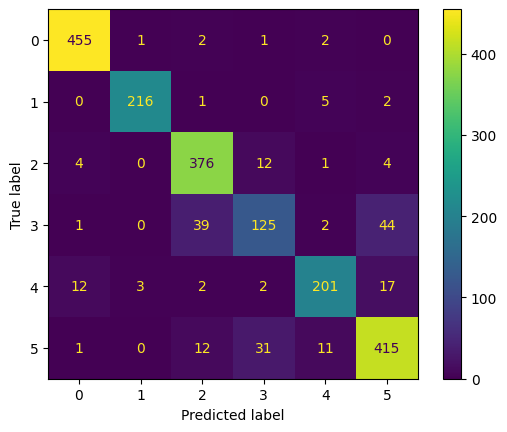

In [ ]:
disp.plot()

Conclusion

The bagging model did well with the data set. The classification scores were very similar to the previous random forest classifier. The accuracy score dropped but only by 0.02, as it is 0.89. The same pattern occurred with this model as well. Class 4 had the lowest scores out of all classes.

# **Problem 3**

In [ ]:
banknote_df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [ ]:
banknote_df.head(5)

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Splitting Data into Train/Test

In [ ]:
X = banknote_df[['variance', 'skewness', 'curtosis', 'entropy']]
y = banknote_df[['forgery']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=32)

Building the Pipeline

In [ ]:
num_variables = ['variance', 'skewness', 'curtosis', 'entropy']

In [ ]:
col_transform = ColumnTransformer(transformers=[
              ('num', MinMaxScaler(), num_variables,)
              ])

In [ ]:
random_forest = Pipeline([
                  ('transform', col_transform),
                  ('rf', RandomForestClassifier(n_estimators=1000,
                                                max_samples=500,
                                                bootstrap=True,
                                                n_jobs=-1))
])

Executing the Model

In [ ]:
random_forest.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        n_jobs=-1))])

Evaluating the Model

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0
 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1
 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0]


In [ ]:
print(eval_clf_model(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       156
           1       0.98      1.00      0.99       119

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

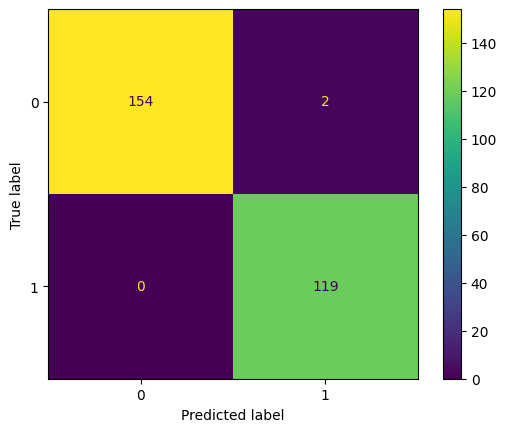

In [ ]:
disp.plot()

Conclusion

Overall, this model did very well with the banknote authentication data set. All of the classification scores were high. The accuracy score is 0.99.